<a href="https://colab.research.google.com/github/Monika9763/Jeremy-Howard-Squadron-/blob/main/NY_TLC_Trip_Data_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
from numpy import math
#from haversine import haversine
import xgboost
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sns
from datetime import datetime
#import klib


from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings("ignore")
import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

<ipython-input-7-8f666244fd51>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [8]:
path ="/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2022-01.parquet"
df=pd.read_parquet(path)

In [9]:
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [10]:
df.shape

(2463931, 19)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [12]:
df.isnull().sum()*100/len(df)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          2.901989
trip_distance            0.000000
RatecodeID               2.901989
store_and_fwd_flag       2.901989
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     2.901989
airport_fee              2.901989
dtype: float64

In [13]:
df=df.dropna()

In [14]:
df.shape

(2392428, 19)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2392428 entries, 0 to 2392427
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [16]:
#Calculate trip duration from pickup time to dropout time.
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()
columns_to_drop = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
df = df.drop(columns=columns_to_drop)


In [17]:
label_encoder = LabelEncoder()

df['store_and_fwd_flag'] = label_encoder.fit_transform(df['store_and_fwd_flag'])

In [18]:
df_float = df.astype(float)

In [19]:
df_float

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration
0,1.0,2.0,3.80,1.0,0.0,142.0,236.0,1.0,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,1069.0
1,1.0,1.0,2.10,1.0,0.0,236.0,42.0,1.0,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,504.0
2,2.0,1.0,0.97,1.0,0.0,166.0,166.0,1.0,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,538.0
3,2.0,1.0,1.09,1.0,0.0,114.0,68.0,2.0,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,602.0
4,2.0,1.0,4.30,1.0,0.0,68.0,163.0,1.0,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,2252.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392423,1.0,1.0,1.50,1.0,0.0,163.0,143.0,2.0,7.5,3.0,0.5,0.00,0.0,0.3,11.30,2.5,0.0,499.0
2392424,2.0,1.0,1.02,1.0,0.0,249.0,68.0,1.0,5.5,0.5,0.5,1.86,0.0,0.3,11.16,2.5,0.0,261.0
2392425,2.0,1.0,1.53,1.0,0.0,68.0,90.0,1.0,8.0,0.5,0.5,2.95,0.0,0.3,14.75,2.5,0.0,493.0
2392426,2.0,1.0,1.59,1.0,0.0,90.0,79.0,1.0,7.5,0.5,0.5,2.26,0.0,0.3,13.56,2.5,0.0,465.0


In [20]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'nyc_df' is your DataFrame
# Replace this with your actual data or load your dataset

# Specify the variables for which to calculate VIF
# Exclude variables that might be dependent or cause multicollinearity
exclude_vars = ['trip_duration']  # Add other variables to exclude if necessary
x_vars = [col for col in df_float.columns if col not in exclude_vars]

# Create a DataFrame containing only the specified x_vars
x_data = df_float[x_vars]

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = x_vars
vif_data["VIF"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]

# Display the VIF values
print(vif_data)

                 Variable            VIF
0                VendorID      60.918890
1         passenger_count       3.057136
2           trip_distance       3.446998
3              RatecodeID       1.161929
4      store_and_fwd_flag       1.076527
5            PULocationID       7.602233
6            DOLocationID       6.442155
7            payment_type      11.086336
8             fare_amount  541826.108234
9                   extra       9.927604
10                mta_tax     162.773000
11             tip_amount     106.485501
12           tolls_amount      26.191907
13  improvement_surcharge     178.567048
14           total_amount  544027.525336
15   congestion_surcharge      54.066469
16            airport_fee       2.936187


In [21]:
# Assuming 'your_dataframe' is your DataFrame with 290,000 rows and 18 columns
# Replace 'your_dataframe' with the actual variable name of your DataFrame

# Calculate Q1, Q3, and IQR for each column
Q1 = df_float.quantile(0.05)
Q3 = df_float.quantile(0.95)
IQR = Q3 - Q1

# Define lower and upper bounds for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each column
outliers = (df_float < lower_bound) | (df_float > upper_bound)

# Optionally, remove outliers from the DataFrame
filtered_dataframe1 = df_float[~outliers.any(axis=1)]

# Display information about outliers and filtered DataFrame
print("Columns with Outliers:")
print(outliers.sum())

print("\nOriginal DataFrame Shape:", df_float.shape)
print("Filtered DataFrame Shape:", filtered_dataframe1.shape)

Columns with Outliers:
VendorID                     0
passenger_count             20
trip_distance             2240
RatecodeID               96065
store_and_fwd_flag       54932
PULocationID                 0
DOLocationID                 0
payment_type             10674
fare_amount               4022
extra                       14
mta_tax                  28784
tip_amount                5307
tolls_amount              2475
improvement_surcharge    13799
total_amount              3345
congestion_surcharge         0
airport_fee                  0
trip_duration             5233
dtype: int64

Original DataFrame Shape: (2392428, 18)
Filtered DataFrame Shape: (2220794, 18)


In [22]:

df=filtered_dataframe1

In [23]:
X=df.drop(columns=["trip_duration"])
y=df["trip_duration"]

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)


In [26]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [27]:
print(X_train.shape)
print(X_test.shape)

(1499035, 17)
(555199, 17)


In [28]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [64]:
print("The shape of X_train set is:",X_train.shape)
print("The shape of y_train set is:",y_train.shape)

The shape of X_train set is: (1499035, 17)
The shape of y_train set is: (1499035,)


In [65]:
print("The shape of X_test set is:",X_test.shape)
print("The shape of y_test set is:",y_test.shape)

The shape of X_test set is: (555199, 17)
The shape of y_test set is: (555199,)


In [76]:
!pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [29]:
# Define the number of neurons in each layer
input_neurons = X_train.shape[1]  # Number of features
hidden_neurons = 64  # Number of neurons in the hidden layer
output_neurons = 1  # Number of output neurons

# Define the model architecture with 4 hidden layers
model = tf.keras.Sequential([
    # Input layer
    tf.keras.layers.Input(shape=(input_neurons,)),

    # Hidden layer 1 with ReLU activation function
    tf.keras.layers.Dense(128, activation='relu'),

    # Hidden layer 2 with ReLU activation function
    tf.keras.layers.Dense(96, activation='relu'),

    # Hidden layer 3 with ReLU activation function
    tf.keras.layers.Dense(hidden_neurons, activation='relu'),

    # Hidden layer 4 with ReLU activation function
    tf.keras.layers.Dense(32, activation='relu'),

    # Output layer with linear activation function (for regression)
    ])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model using the training data and validate using the validation data
history = model.fit(X_train, y_train, epochs=21, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/21
46845/46845 [==============================] - 115s 2ms/step - loss: 57071.1875 - val_loss: 9004.1465
Epoch 2/21
46845/46845 [==============================] - 120s 3ms/step - loss: 9065.7920 - val_loss: 8520.7520
Epoch 3/21
46845/46845 [==============================] - 116s 2ms/step - loss: 8667.9883 - val_loss: 8197.4824
Epoch 4/21
46845/46845 [==============================] - 111s 2ms/step - loss: 8451.3730 - val_loss: 8044.5381
Epoch 5/21
46845/46845 [==============================] - 109s 2ms/step - loss: 8294.6670 - val_loss: 8020.8667
Epoch 6/21
46845/46845 [==============================] - 113s 2ms/step - loss: 8210.8193 - val_loss: 8234.6533
Epoch 7/21
46845/46845 [==============================] - 106s 2ms/step - loss: 8098.7173 - val_loss: 8178.7236
Epoch 8/21
46845/46845 [==============================] - 162s 3ms/step - loss: 8061.3882 - val_loss: 10447.5107
Epoch 9/21
46845/46845 [==============================] - 114s 2ms/step - loss: 7986.4873 - val_loss: 

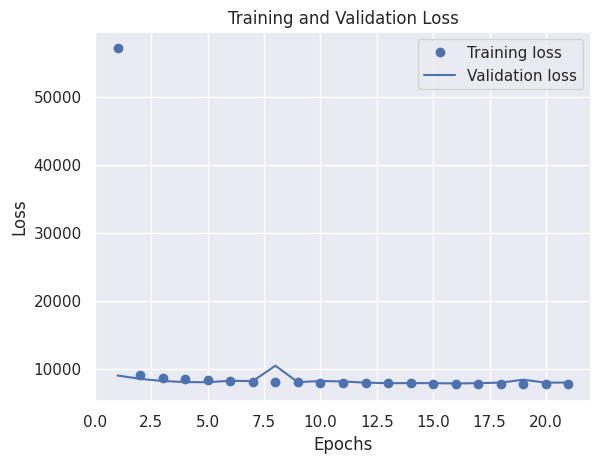

In [86]:
import matplotlib.pyplot as plt



# Get the training loss and validation loss from the history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [87]:
y_pred = model.predict(X_test)

17350/17350 [==============================] - 25s 1ms/step
